In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436603

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436603

In [9]:
model = keras.models.load_model('modelos/modeloGeneral/bidirectional_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436603

13644/13644 [==============================] - 107s 8ms/step


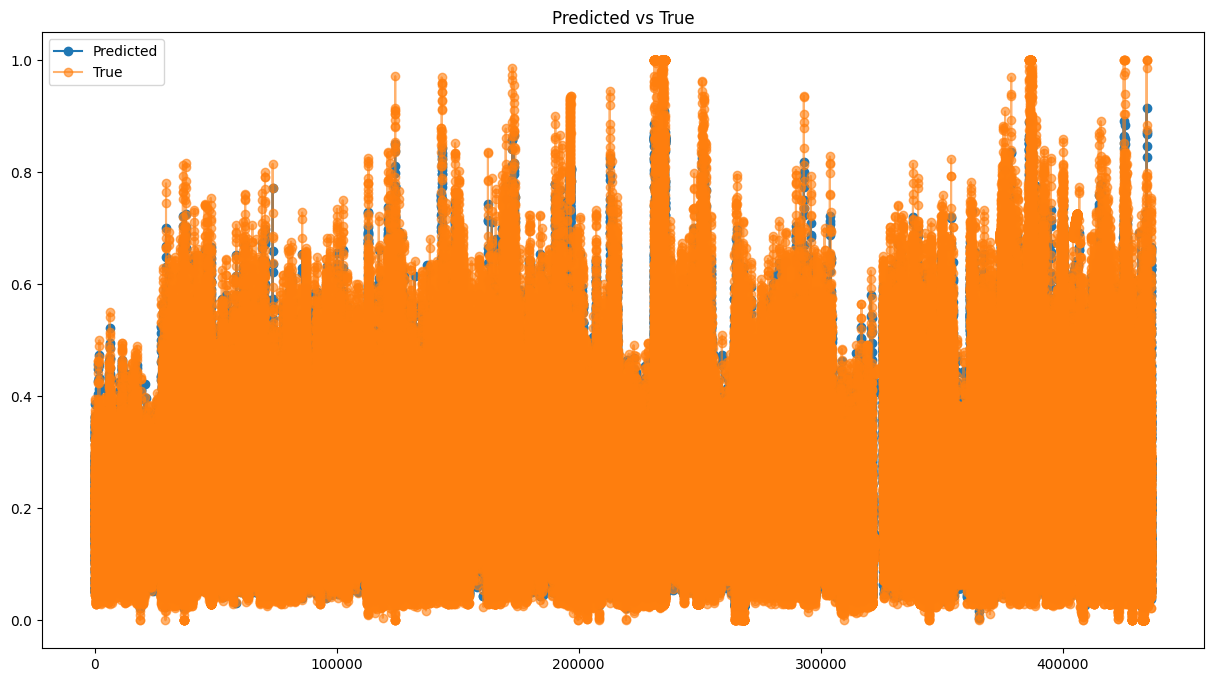

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.01735525082734802,
 'mse': 0.02520851668563019,
 'rmse': 0.0006354693134896956}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          139.428497
1          136.553711
2          137.066513
3          136.623413
4          150.405518
...               ...
436598     124.708717
436599     157.588516
436600     183.103592
436601     201.494293
436602     218.834305

[436603 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436598          137.0
436599          177.0
436600          198.0
436601          216.0
436602          233.0

[436603 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  139.428497
2023-01-01 00:15:00   140.0  136.553711
2023-01-01 00:30:00   139.0  137.066513
2023-01-01 00:45:00   145.0  136.623413
2023-01-01 01:00:00   159.0  150.405518
...                     ...         ...
2035-06-14 21:30:00   137.0  124.708717
2035-06-14 21:45:00   177.0  157.588516
2035-06-14 22:00:00   198.0  183.103592
2035-06-14 22:15:00   216.0  201.494293
2035-06-14 22:30:00   233.0  218.834305

[436603 rows x 2 columns]

AP, BE, EP: (0.9872103196961993, 0.010959638297579948, 0.0018300420062207685)


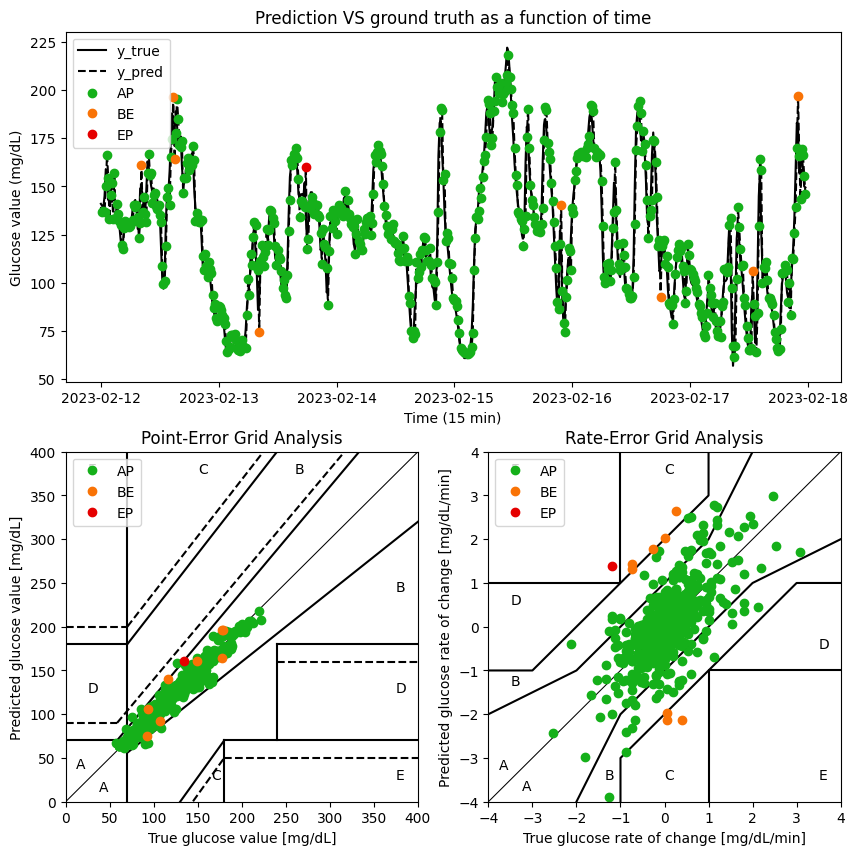

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-12 00:00:00   141.0  139.428497       NaN       NaN    NaN   
1      2023-02-12 00:15:00   140.0  136.553711 -0.066667 -0.191652     AP   
2      2023-02-12 00:30:00   139.0  137.066513 -0.066667  0.034187     AP   
3      2023-02-12 00:45:00   145.0  136.623413  0.400000 -0.029540     AP   
4      2023-02-12 01:00:00   159.0  150.405518  0.933333  0.918807     AP   
...                    ...     ...         ...       ...       ...    ...   
436598 2035-07-26 21:30:00   137.0  124.708717  2.333333  2.425285     AP   
436599 2035-07-26 21:45:00   177.0  157.588516  2.666667  2.191987     AP   
436600 2035-07-26 22:00:00   198.0  183.103592  1.400000  1.701005     AP   
436601 2035-07-26 22:15:00   216.0  201.494293  1.200000  1.226047     AP   
436602 2035-07-26 22:30:00   233.0  218.834305  1.133333  1.156001     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436598     A     A  
436599     A     A  
436600     A     A  
436601     A     A  
436602     A     A  

[436603 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 133ms/step


Glucose level Predict  Glucose level True
0               0.216149            0.219565
1               0.209899            0.217391

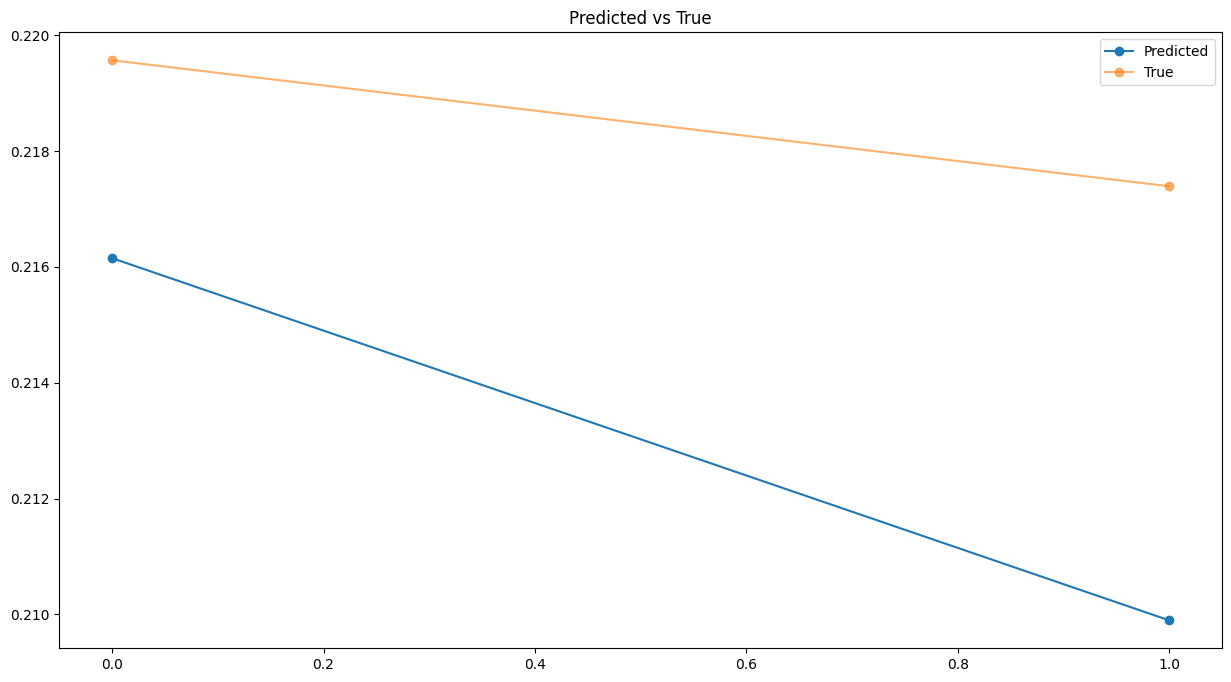

{'mae': 0.005454128915848955,
 'mse': 0.0058223869599487565,
 'rmse': 3.390018991138132e-05}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             139.428497               141.0
1             136.553711               140.0

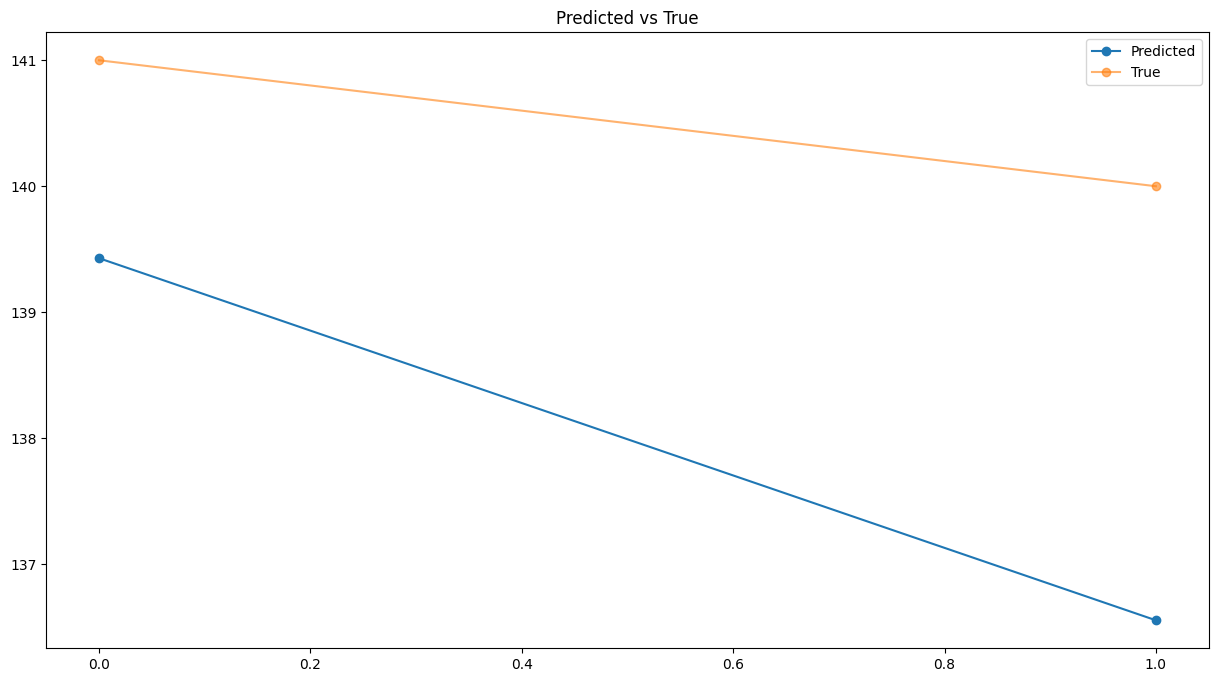

{'mae': 2.5088958740234375,
 'mse': 2.6782950727083983,
 'rmse': 7.173264496494085}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 30ms/step


Glucose level Predict  Glucose level True
0               0.216149            0.219565
1               0.206862            0.217391

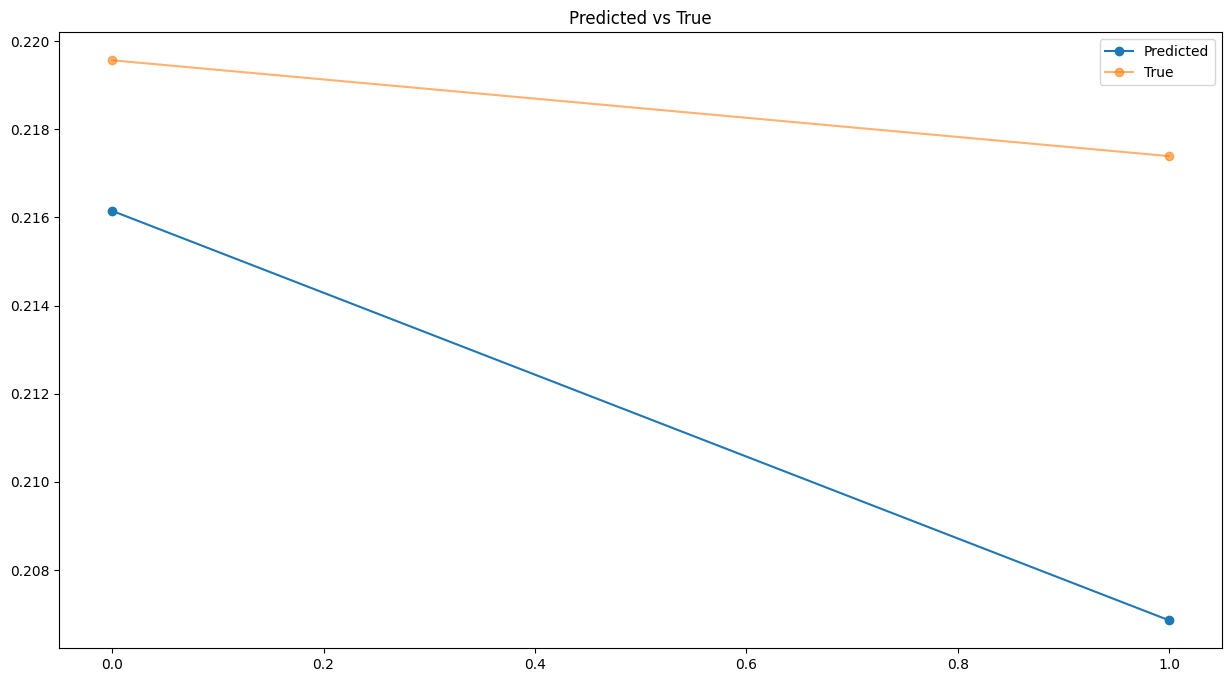

{'mae': 0.006972967023434862,
 'mse': 0.00782763728924203,
 'rmse': 6.127190553193232e-05}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             139.428497               141.0
1             135.156387               140.0

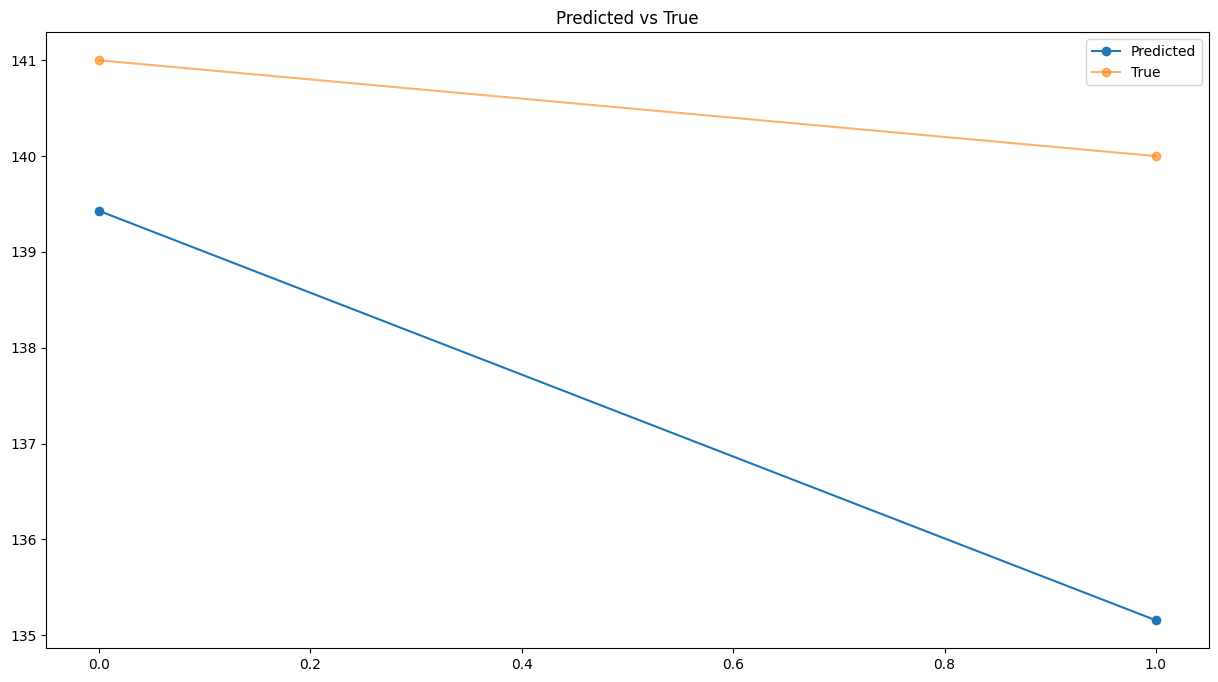

{'mae': 3.2075576782226562,
 'mse': 3.600708568904802,
 'rmse': 12.965102198184468}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 9ms/step


Glucose level Predict  Glucose level True
0               0.209939            0.182609
1               0.151781            0.154348
2               0.156870            0.152174
3               0.158369            0.150000
4               0.151114            0.123913

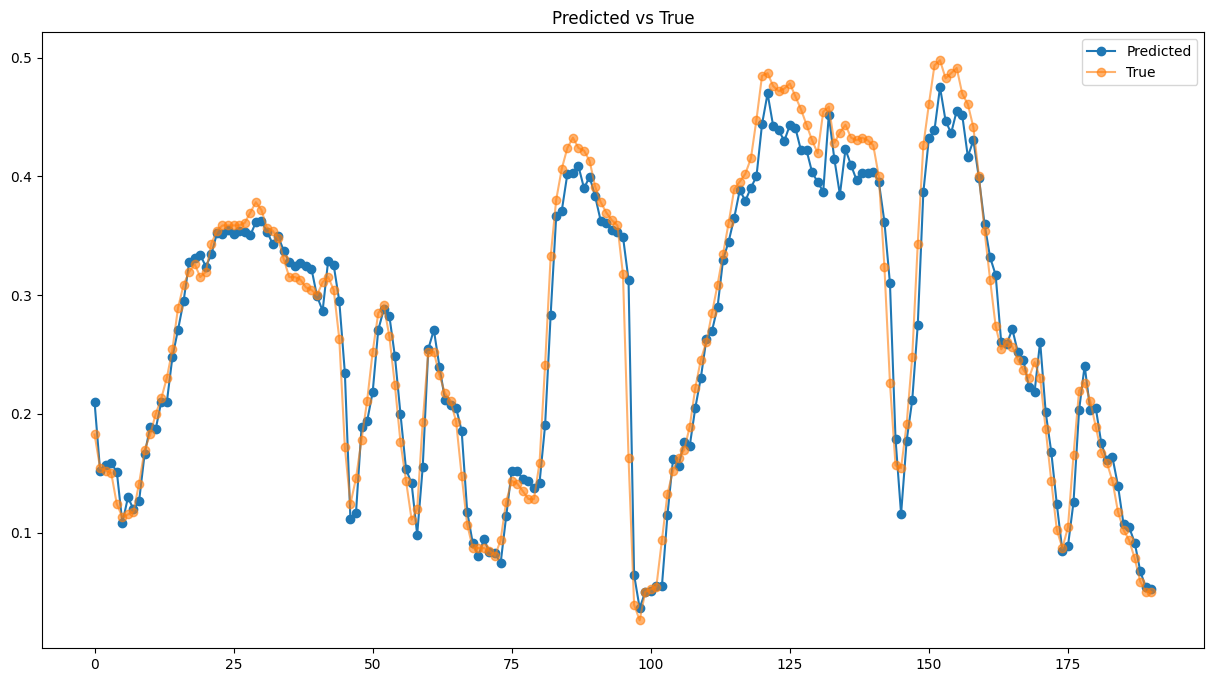

{'mae': 0.018987492033175072,
 'mse': 0.025772711365394285,
 'rmse': 0.0006642326511239237}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

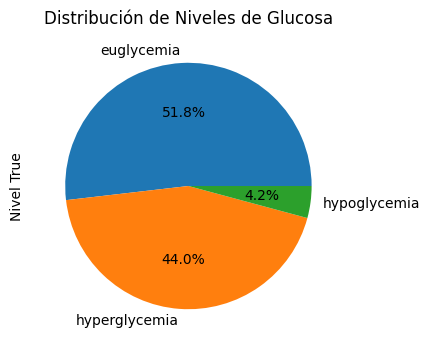

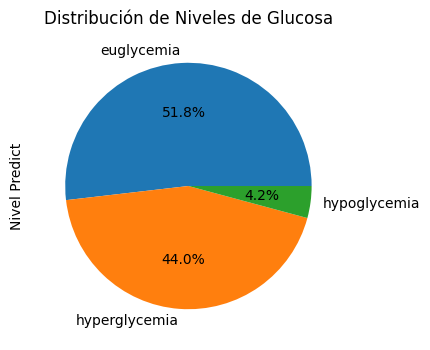

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             136.571991    euglycemia
1               111.0  euglycemia             109.819283    euglycemia
2               110.0  euglycemia             112.160362    euglycemia
3               109.0  euglycemia             112.849678    euglycemia
4                97.0  euglycemia             109.512360    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


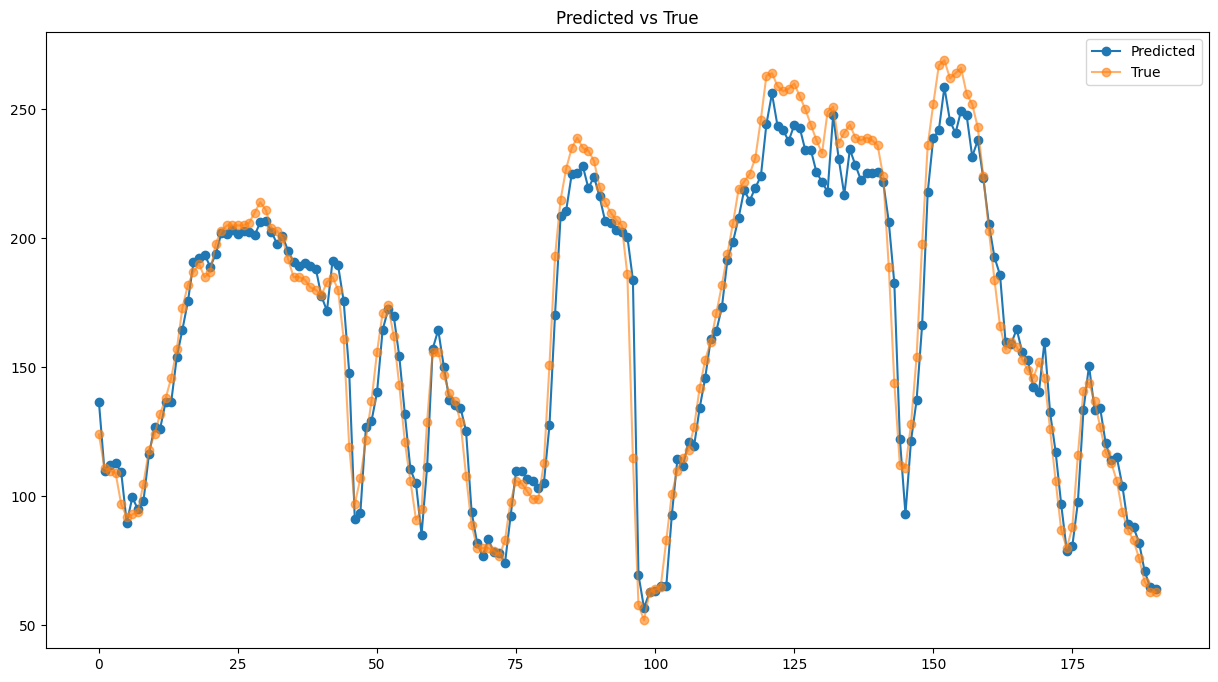

{'mae': 8.734246918044166,
 'mse': 11.855448177643183,
 'rmse': 140.55165149278307}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  136.571991
2023-01-01 00:15:00   111.0  109.819283
2023-01-01 00:30:00   110.0  112.160362
2023-01-01 00:45:00   109.0  112.849678
2023-01-01 01:00:00    97.0  109.512360
...                     ...         ...
2023-01-02 22:30:00    83.0   88.043388
2023-01-02 22:45:00    76.0   82.117287
2023-01-02 23:00:00    67.0   71.017975
2023-01-02 23:15:00    63.0   64.703072
2023-01-02 23:30:00    63.0   64.016266

[191 rows x 2 columns]

AP, BE, EP: (1.0, 0.0, 0.0)


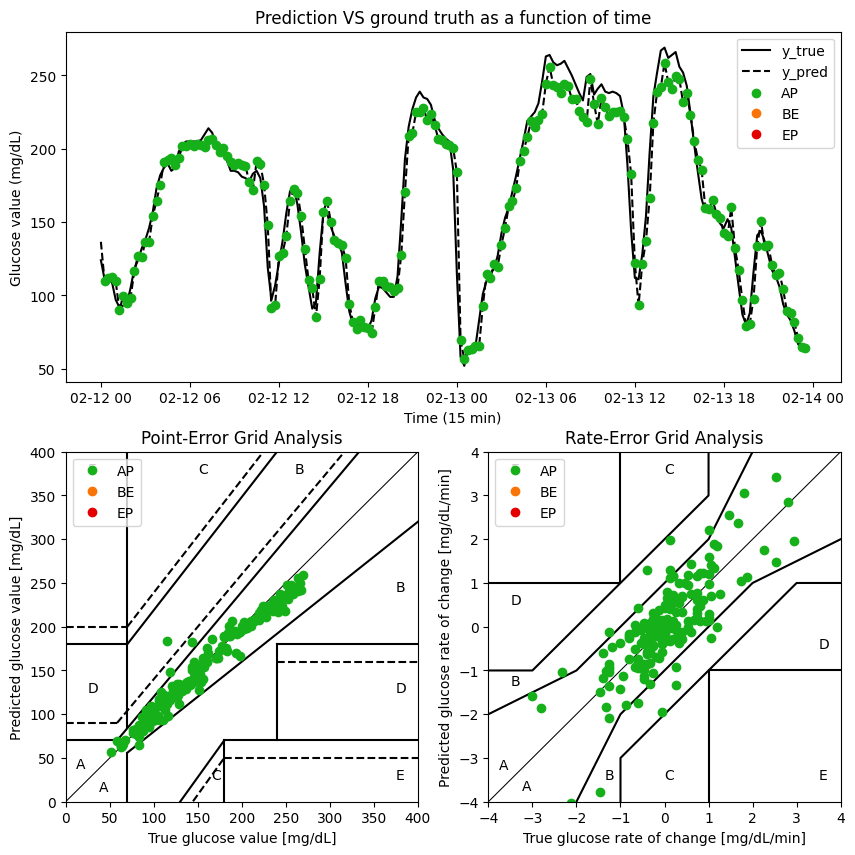

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 8ms/step


Glucose level Predict  Glucose level True
0               0.353681            0.373913
1               0.365531            0.400000
2               0.393933            0.404348
3               0.378983            0.406522
4               0.386826            0.397826

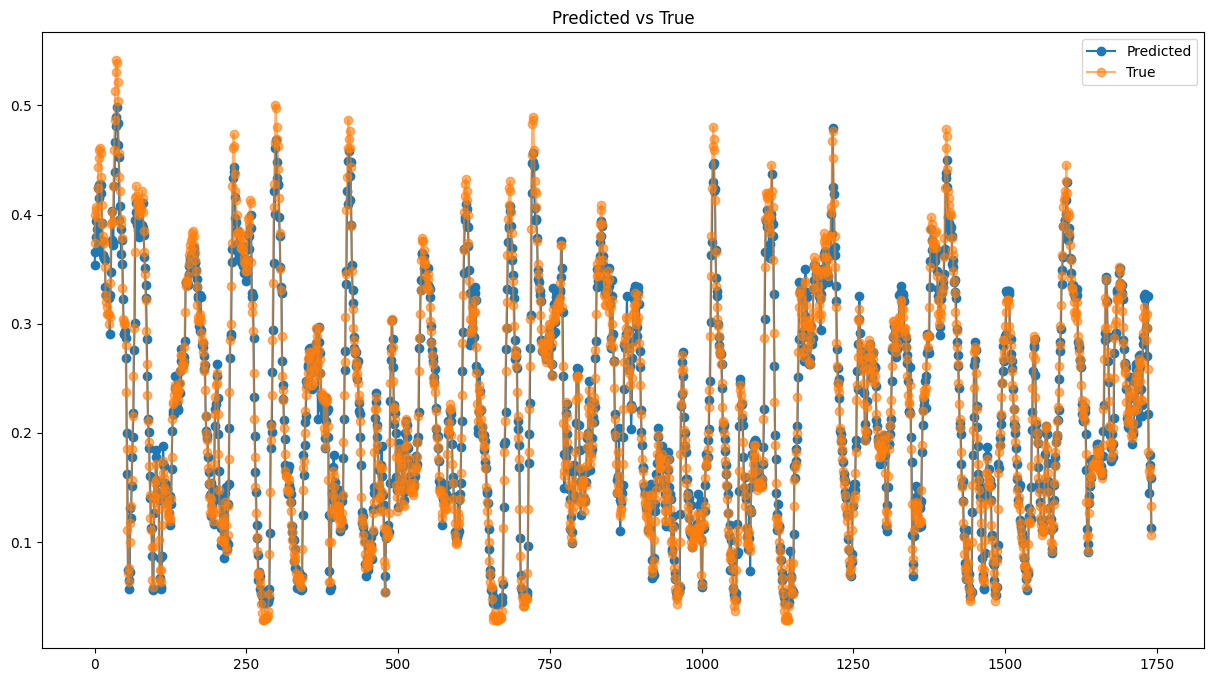

{'mae': 0.012726373234956673,
 'mse': 0.016500804453484244,
 'rmse': 0.00027227654761212547}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

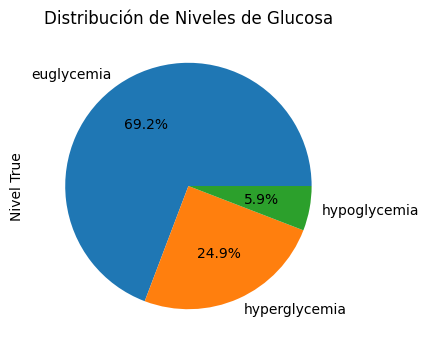

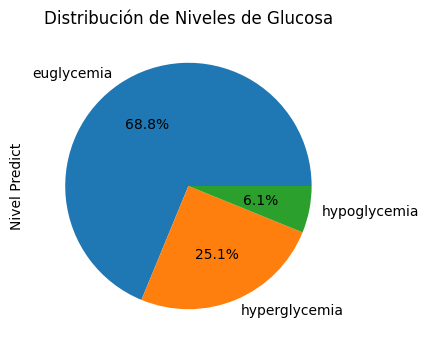

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             202.693237  hyperglycemia
1               224.0  hyperglycemia             208.144318  hyperglycemia
2               226.0  hyperglycemia             221.209015  hyperglycemia
3               227.0  hyperglycemia             214.332321  hyperglycemia
4               223.0  hyperglycemia             217.939987  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


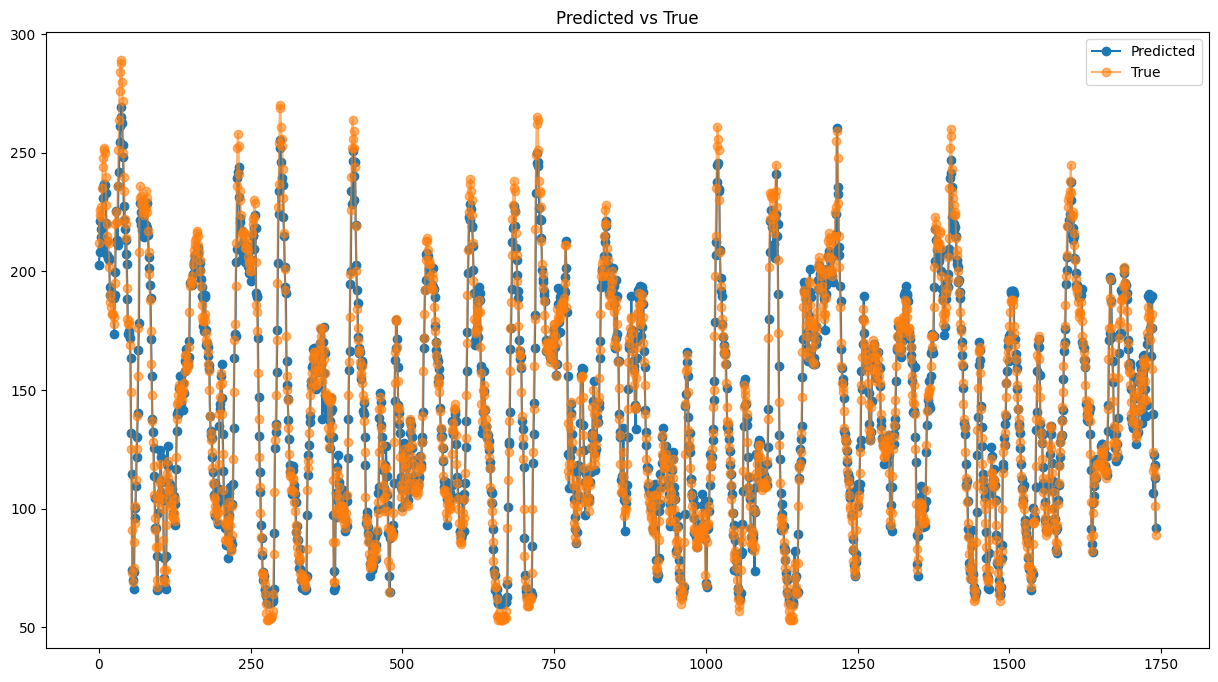

{'mae': 5.854131449404869, 'mse': 7.590369819427542, 'rmse': 57.6137139956765}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  202.693237
2023-01-01 00:15:00   224.0  208.144318
2023-01-01 00:30:00   226.0  221.209015
2023-01-01 00:45:00   227.0  214.332321
2023-01-01 01:00:00   223.0  217.939987
...                     ...         ...
2023-01-19 02:15:00   116.0  106.831482
2023-01-19 02:30:00   117.0  122.834099
2023-01-19 02:45:00   114.0  118.478951
2023-01-19 03:00:00   101.0  112.774475
2023-01-19 03:15:00    89.0   92.056633

[1742 rows x 2 columns]

AP, BE, EP: (0.996553704767375, 0.0034462952326249283, 0.0)


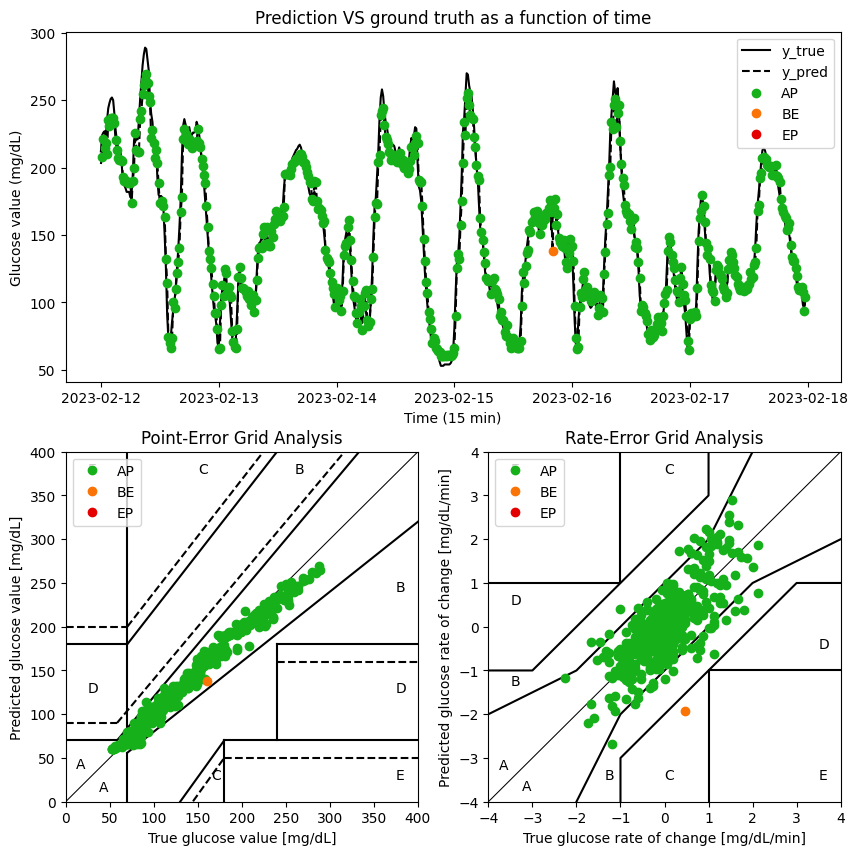

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 10ms/step


Glucose level Predict  Glucose level True
0               0.275366            0.261858
1               0.252448            0.229051
2               0.203390            0.196245
3               0.180545            0.163439
4               0.150352            0.130632

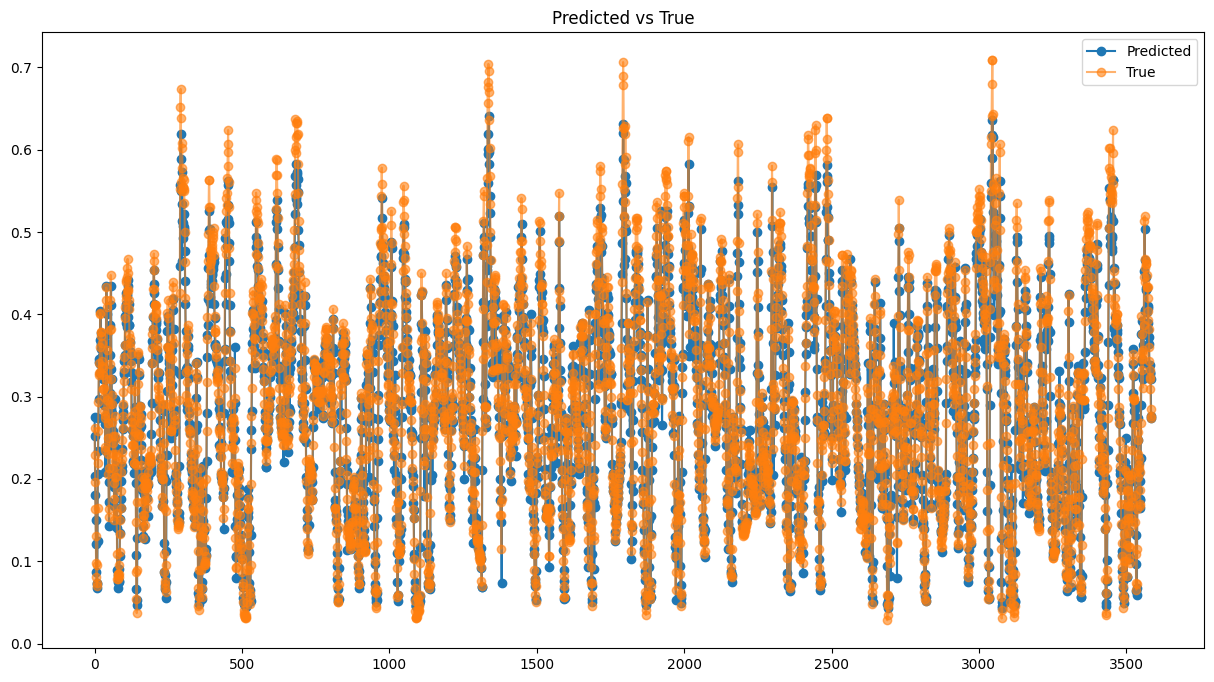

{'mae': 0.020668266847836243,
 'mse': 0.027942237529171868,
 'rmse': 0.0007807686381366609}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

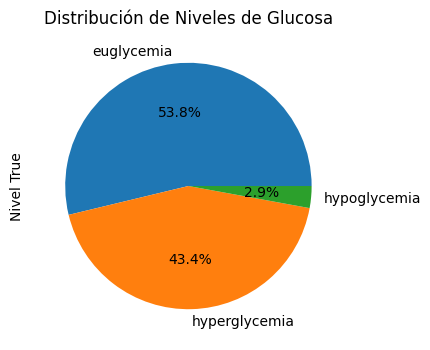

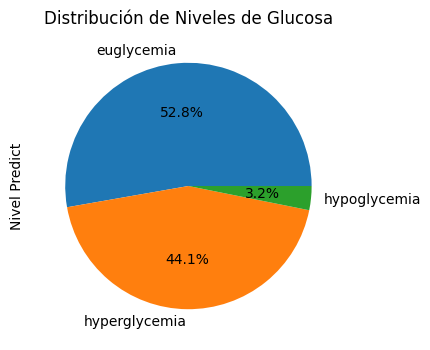

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0          160.454545  euglycemia             166.668243    euglycemia
1          145.363636  euglycemia             156.125885    euglycemia
2          130.272727  euglycemia             133.559387    euglycemia
3          115.181818  euglycemia             123.050499    euglycemia
4          100.090909  euglycemia             109.162056    euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


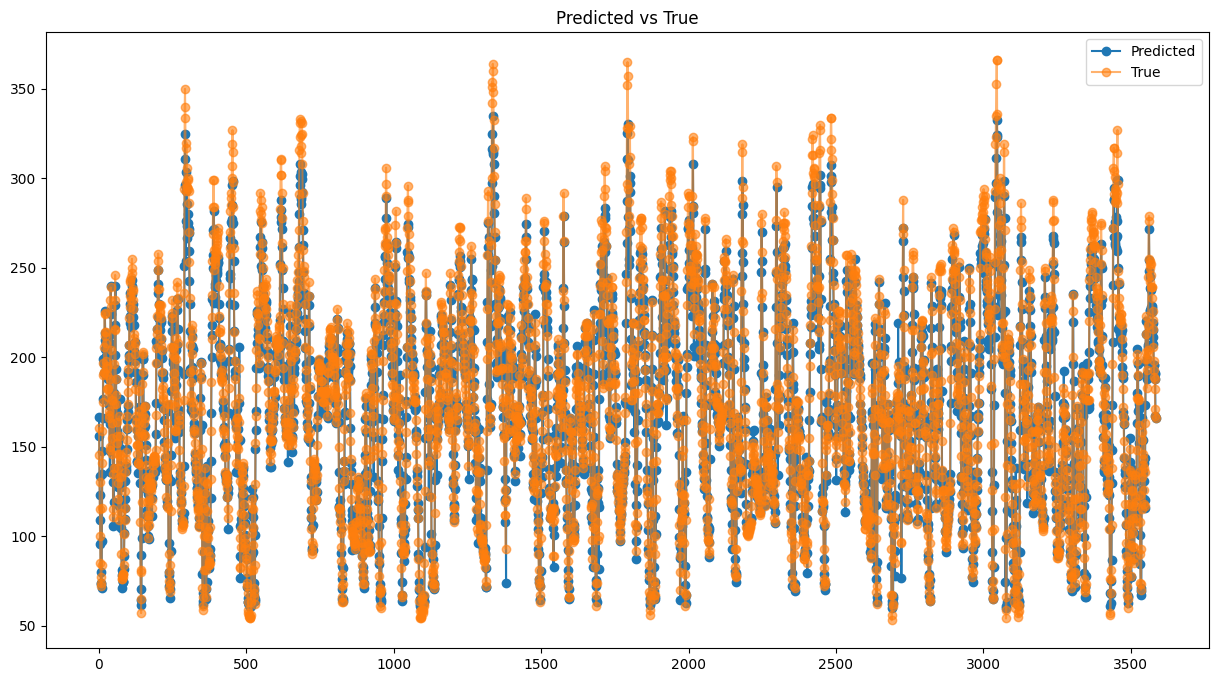

{'mae': 9.507403585034828,
 'mse': 12.853430601171752,
 'rmse': 165.21067821913843}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  166.668243
2023-01-01 00:15:00  145.363636  156.125885
2023-01-01 00:30:00  130.272727  133.559387
2023-01-01 00:45:00  115.181818  123.050499
2023-01-01 01:00:00  100.090909  109.162056
...                         ...         ...
2023-02-07 07:15:00  188.000000  190.528259
2023-02-07 07:30:00  182.000000  191.460327
2023-02-07 07:45:00  171.000000  187.644562
2023-02-07 08:00:00  167.000000  167.196121
2023-02-07 08:15:00  166.000000  166.175461

[3586 rows x 2 columns]

AP, BE, EP: (0.9815899581589959, 0.016178521617852163, 0.0022315202231520223)


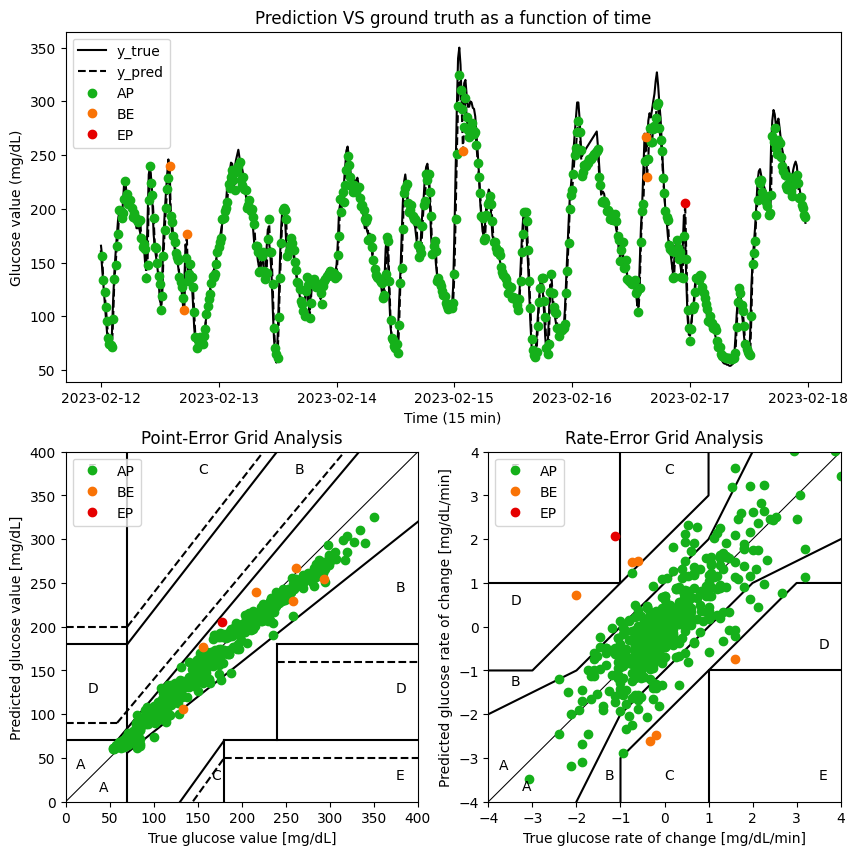

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 2s 9ms/step


Glucose level Predict  Glucose level True
0               0.495680            0.534783
1               0.477658            0.500000
2               0.431982            0.484783
3               0.447040            0.463043
4               0.410463            0.428261

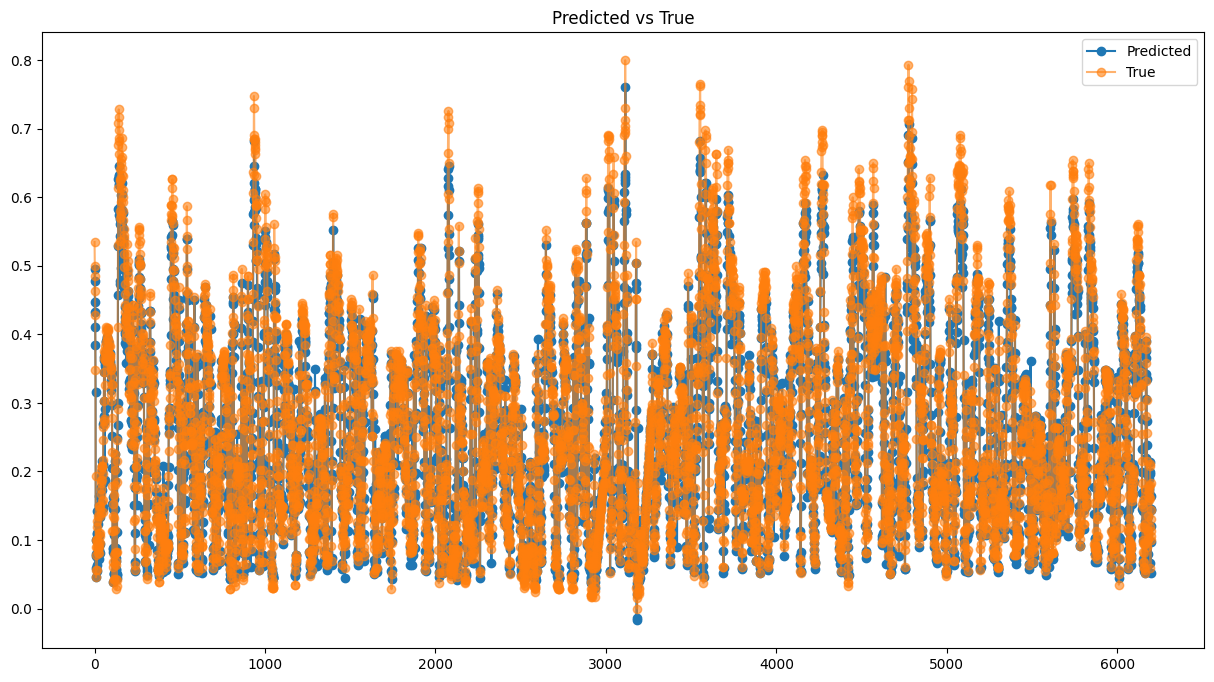

{'mae': 0.02308147340338077,
 'mse': 0.0318189694482963,
 'rmse': 0.0010124468167516134}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

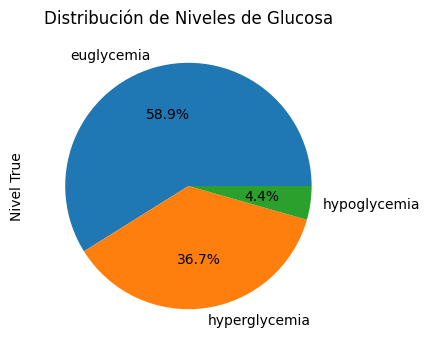

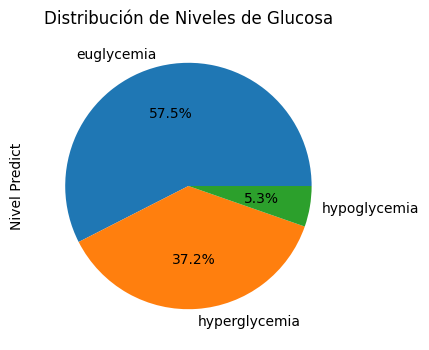

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             268.012848  hyperglycemia
1               270.0  hyperglycemia             259.722717  hyperglycemia
2               263.0  hyperglycemia             238.711899  hyperglycemia
3               253.0  hyperglycemia             245.638290  hyperglycemia
4               237.0  hyperglycemia             228.812897  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


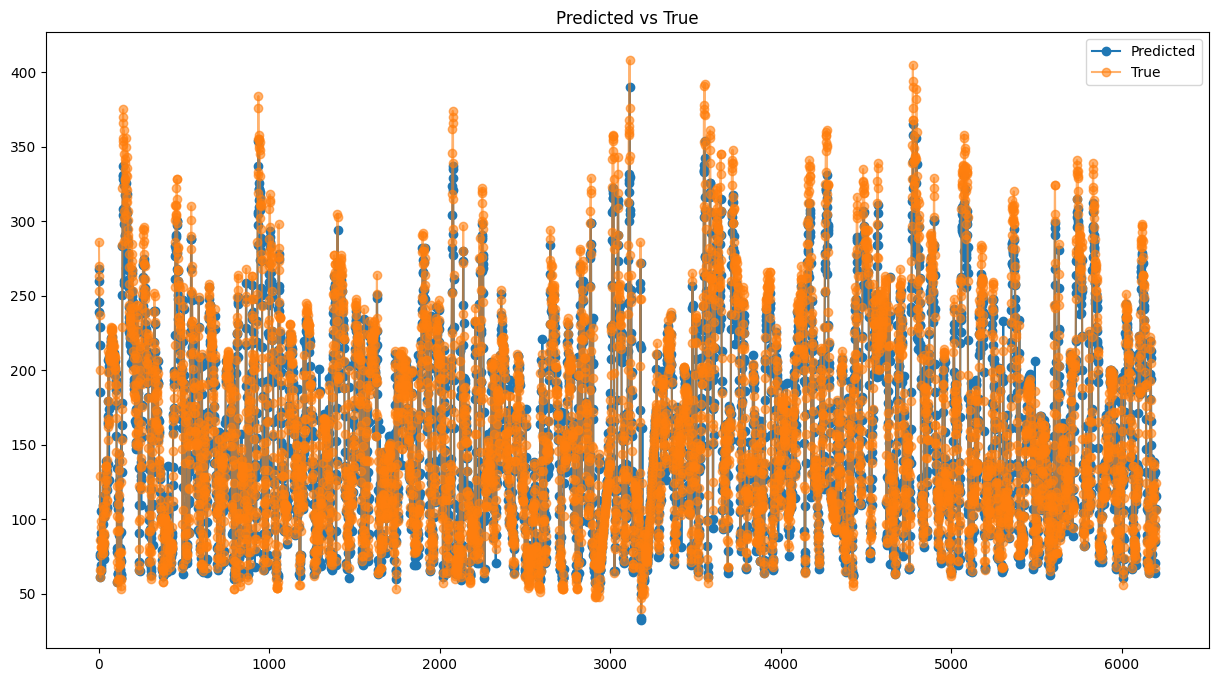

{'mae': 10.617478725414854,
 'mse': 14.636727725201858,
 'rmse': 214.23379850169277}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  268.012848
2023-01-01 00:15:00   270.0  259.722717
2023-01-01 00:30:00   263.0  238.711899
2023-01-01 00:45:00   253.0  245.638290
2023-01-01 01:00:00   237.0  228.812897
...                     ...         ...
2023-03-06 13:00:00   100.0  106.052979
2023-03-06 13:15:00    89.0   95.182343
2023-03-06 13:30:00    92.0   84.406799
2023-03-06 13:45:00   106.0  107.140404
2023-03-06 14:00:00   124.0  115.466988

[6201 rows x 2 columns]

AP, BE, EP: (0.967741935483871, 0.027903225806451614, 0.004354838709677419)


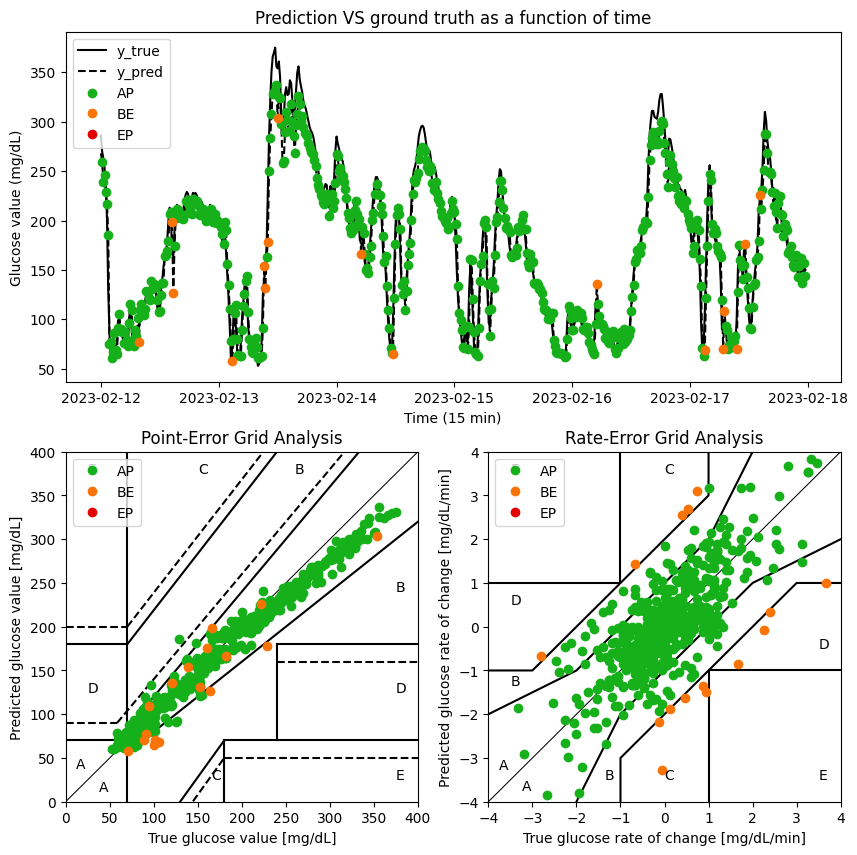

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)